# Task 1:

In [470]:
# Importing the necessary library for dataset fetching
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetching the mushroom dataset using its unique identifier (ID: 848)
# This retrieves the dataset and its associated metadata
secondary_mushroom = fetch_ucirepo(id=848)

# Extracting features and target variables from the fetched dataset
# `features` contains the input data, and `targets` contains the output labels
X = secondary_mushroom.data.features 
Y = secondary_mushroom.data.targets

# Printing metadata about the dataset to understand its structure and origin
print(secondary_mushroom.metadata)

# Printing variable information to see details about each feature in the dataset
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'published_in': 'Scientific Reports', 'year': 2021, 'url': 'https://www.semanticscholar.org/

# Task 2: handling the Missing value

In [472]:
# Importing the necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combining the features and target variables into a single DataFrame
# `X` contains the feature data, and `Y` contains the target labels
dataframe = pd.concat([X, Y], axis=1)

# Checking for duplicate rows in the combined DataFrame
# `.duplicated().sum()` returns the count of duplicate rows
print("Number of duplicate rows before removal:", dataframe.duplicated().sum())

# Removing duplicate rows while keeping the last occurrence of each duplicate
dataframe = dataframe.drop_duplicates(keep='last')

# Checking again for duplicate rows to confirm removal
print("Number of duplicate rows after removal:", dataframe.duplicated().sum())

# Displaying the first few rows of the cleaned DataFrame
dataframe.head()


Number of duplicate rows before removal: 146
Number of duplicate rows after removal: 0


,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,...,y,w,u,w,t,p,NaN,d,w,p


In [474]:
# Checking for missing values in the DataFrame
# `.isnull().sum()` provides a count of missing values in each column
print("Missing values in each column before handling:\n", dataframe.isnull().sum())

# Filling missing values with the mode (most frequent value) for categorical columns
dataframe['cap-surface'] = dataframe['cap-surface'].fillna(dataframe['cap-surface'].mode()[0])
dataframe['gill-attachment'] = dataframe['gill-attachment'].fillna(dataframe['gill-attachment'].mode()[0])
dataframe['gill-spacing'] = dataframe['gill-spacing'].fillna(dataframe['gill-spacing'].mode()[0])
dataframe['stem-root'] = dataframe['stem-root'].fillna(dataframe['stem-root'].mode()[0])
dataframe['stem-surface'] = dataframe['stem-surface'].fillna(dataframe['stem-surface'].mode()[0])
dataframe['veil-type'] = dataframe['veil-type'].fillna(dataframe['veil-type'].mode()[0])
dataframe['veil-color'] = dataframe['veil-color'].fillna(dataframe['veil-color'].mode()[0])
dataframe['ring-type'] = dataframe['ring-type'].fillna(dataframe['ring-type'].mode()[0])
dataframe['spore-print-color'] = dataframe['spore-print-color'].fillna(dataframe['spore-print-color'].mode()[0])

# Checking again for any remaining missing values after filling
print("Missing values in each column after handling:\n", dataframe.isnull().sum())


Missing values in each column before handling:
 cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
class                       0
dtype: int64
Missing values in each column after handling:
 cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
st

# Task 3 

In [479]:
# Displaying the first 10 rows of the DataFrame to get an overview of the data
print("First 10 rows of the DataFrame:\n", dataframe.head(10))

# Printing the shape of the DataFrame to show the number of rows and columns
print("Shape of the DataFrame (rows, columns):", dataframe.shape)

# Counting the occurrences of each unique value in the 'class' column
# This helps in understanding the distribution of classes in the dataset
print("Distribution of classes in the 'class' column:\n", dataframe['class'].value_counts())


First 10 rows of the DataFrame:
    cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   
5         15.34         x           g         o                    f   
6         14.85         f           h         o                    f   
7         14.86         x           h         e                    f   
8         12.85         f           g         o                    f   
9         13.55         f           g         e                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width  ...  \
0               e            c          w        16.95       17.09  ...   
1               e       

In [482]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

# Initializing the StandardScaler for feature scaling
scaler = StandardScaler()

# Identifying categorical columns in the DataFrame
categorical_columns = dataframe.select_dtypes(include=['object']).columns

# Identifying numerical columns in the DataFrame
numerical_columns = dataframe.select_dtypes(include=['int64', 'float64']).columns

# Separating numerical and categorical data
numerical_data = dataframe[numerical_columns]
categorical_data = dataframe[categorical_columns]
categorical_data1 = categorical_data.copy()  # Copying categorical data for potential later use

# Initializing LabelEncoder for encoding categorical features
label_encoder = LabelEncoder()

# Encoding categorical columns using LabelEncoder
for col in categorical_columns:
    # Transforming categorical values to numerical values for each column
    categorical_data[col] = label_encoder.fit_transform(categorical_data[col])

print(categorical_data)

C:\Users\badha\AppData\Local\Temp\ipykernel_4388\287192737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col])
C:\Users\badha\AppData\Local\Temp\ipykernel_4388\287192737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col])
C:\Users\badha\AppData\Local\Temp\ipykernel_4388\287192737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

       cap-shape  cap-surface  cap-color  does-bruise-or-bleed  \
0              6            2          6                     0   
1              6            2          6                     0   
2              6            2          6                     0   
3              2            3          1                     0   
4              6            3          6                     0   
...          ...          ...        ...                   ...   
61064          5            7         11                     0   
61065          2            7         11                     0   
61066          5            7         11                     0   
61067          2            7         11                     0   
61068          5            7         11                     0   

       gill-attachment  gill-spacing  gill-color  stem-root  stem-surface  \
0                    2             0          10          4             7   
1                    2             0          10     

C:\Users\badha\AppData\Local\Temp\ipykernel_4388\287192737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col])
C:\Users\badha\AppData\Local\Temp\ipykernel_4388\287192737.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_data[col] = label_encoder.fit_transform(categorical_data[col])


In [457]:
encoded_categorical_data = categorical_data

In [484]:
# Importing necessary library for scaling
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler for feature scaling
scaler = StandardScaler()

# Standardizing the numerical data
numerical_data_scaled = scaler.fit_transform(numerical_data)

# Converting the scaled numerical data back into a DataFrame
numerical_data_scaled_df = pd.DataFrame(numerical_data_scaled, columns=numerical_columns)

# Combining the scaled numerical data with the categorical data
combined_data = pd.concat([numerical_data_scaled_df, categorical_data], axis=1)

# Printing the first few rows of the combined DataFrame to verify
print("Combined Data:")
print(combined_data.head())


Combined Data:
   cap-diameter  stem-height  stem-width  cap-shape  cap-surface  cap-color  \
0      1.616820     3.082356    0.489669        6.0          2.0        6.0   
1      1.871167     3.391996    0.599337        6.0          2.0        6.0   
2      1.390945     3.335427    0.554473        6.0          2.0        6.0   
3      1.409926     2.731032    0.379004        2.0          3.0        1.0   
4      1.499137     2.957308    0.500636        6.0          3.0        6.0   

   does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  ...  \
0                   0.0              2.0           0.0        10.0  ...   
1                   0.0              2.0           0.0        10.0  ...   
2                   0.0              2.0           0.0        10.0  ...   
3                   0.0              2.0           0.0        10.0  ...   
4                   0.0              2.0           0.0        10.0  ...   

   stem-surface  stem-color  veil-type  veil-color  has-rin

In [485]:
# Importing the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# 27% of the data will be used for testing, and the rest for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27, random_state=3)

# Printing the shapes of the original, training, and testing datasets
print(f"Original dataset shape: {X.shape}")
print(f"Training dataset shape: {X_train.shape}")
print(f"Testing dataset shape: {X_test.shape}")


Original dataset shape: (61069, 20)
Training dataset shape: (44580, 20)
Testing dataset shape: (16489, 20)


# Task 4

In [487]:
import numpy as np
import pandas as pd

class NaiveBayesClassifier:
    def __init__(self):
        # Initialize dictionaries for priors, likelihoods, and feature types
        self.priors = {}
        self.likelihoods = {}
        self.feature_types = {}
        self.classes = None
    
    def fit(self, X, y):
        # Determine unique classes
        self.classes = np.unique(y)
        
        # Identify feature types (continuous or categorical)
        for feature in X.columns:
            if X[feature].dtype in ['int64', 'float64']:
                self.feature_types[feature] = 'continuous'
            else:
                self.feature_types[feature] = 'categorical'
        
        # Compute prior probabilities and likelihoods for each class
        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / len(X)
            self.likelihoods[c] = {}
            for feature in X.columns:
                if self.feature_types[feature] == 'continuous':
                    # Calculate mean and variance for continuous features
                    mean = X_c[feature].mean()
                    var = X_c[feature].var()
                    self.likelihoods[c][feature] = (mean, var)
                else:
                    # Calculate probabilities for categorical features
                    probs = X_c[feature].value_counts(normalize=True).to_dict()
                    self.likelihoods[c][feature] = probs
    
    def gaussian_pdf(self, x, mean, var):
        # Handle potential type mismatch
        if not isinstance(x, (int, float)):
            return 1e-6  # Return a small non-zero value if x is not numeric
        
        # Compute Gaussian probability density function
        coefficient = 1 / np.sqrt(2 * np.pi * var)
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        return coefficient * exponent
    
    def predict_instance(self, x):
        # Compute posterior probabilities for each class
        posteriors = {}
        for c in self.classes:
            prior = np.log(self.priors[c])
            likelihood = 0
            for feature in x.index:
                if self.feature_types[feature] == 'continuous':
                    # Calculate log likelihood for continuous features
                    mean, var = self.likelihoods[c][feature]
                    likelihood += np.log(self.gaussian_pdf(x[feature], mean, var))
                else:
                    # Use a small value to avoid log(0) for categorical features
                    prob = self.likelihoods[c][feature].get(x[feature], 1e-6)
                    likelihood += np.log(prob)
            posteriors[c] = prior + likelihood
        return max(posteriors, key=posteriors.get)
    
    def predict(self, X):
        # Predict class labels for each instance in the dataset
        return X.apply(self.predict_instance, axis=1)

# Example Usage:
# Assuming X_train (features) and Y_train (target) are already defined

# Initialize and fit the model
model = NaiveBayesClassifier()
model.fit(X_train, Y_train)

# Predict on new data
predictions = model.predict(X_test)

# Output type of distribution used for each feature
for feature, f_type in model.feature_types.items():
    if f_type == 'continuous':
        print(f"Feature '{feature}' uses Gaussian distribution for likelihood.\n")
    else:
        print(f"Feature '{feature}' uses Multinomial/Bernoulli distribution for likelihood.\n")


Feature 'cap-diameter' uses Gaussian distribution for likelihood.

Feature 'cap-shape' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'cap-surface' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'cap-color' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'does-bruise-or-bleed' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'gill-attachment' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'gill-spacing' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'gill-color' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'stem-height' uses Gaussian distribution for likelihood.

Feature 'stem-width' uses Gaussian distribution for likelihood.

Feature 'stem-root' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'stem-surface' uses Multinomial/Bernoulli distribution for likelihood.

Feature 'stem-color' uses Multinomial/Bernoulli distribution for likelihood.

Featu

# Task 5

Accuracy: 44.26%
Precision: 0.44
Recall: 1.00
F1-Score: 0.61


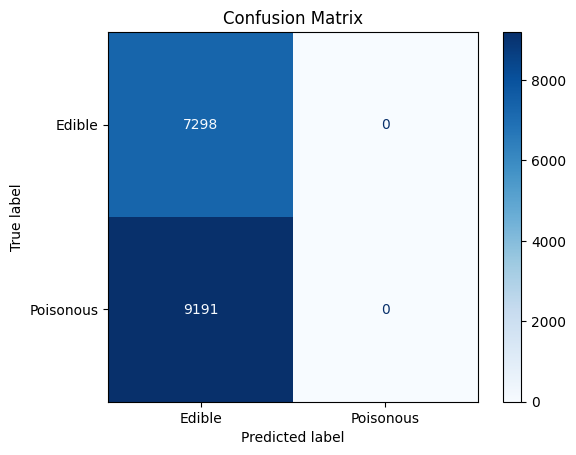

In [489]:
# Assuming the NaiveBayesClassifier class is already defined and implemented
model = NaiveBayesClassifier()  # Initialize the Naive Bayes classifier
model.fit(X_train, Y_train)  # Fit the model to the training data

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Import necessary metrics and visualization libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate and display the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy: {accuracy:.2f}%')

# Calculate and display precision, recall, and F1-score for the positive class
# Here 'e' is assumed to be the positive class; adjust if needed
precision = precision_score(Y_test, Y_pred, pos_label='e')
recall = recall_score(Y_test, Y_pred, pos_label='e')
f1 = f1_score(Y_test, Y_pred, pos_label='e')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Compute and visualize the confusion matrix
# Adjust 'e' and 'p' as needed to match your class labels
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=['e', 'p'])
conf_matrix_disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Edible', 'Poisonous'])
conf_matrix_disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


# Task 6

In [495]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
class                   0
dtype: int64
Training set shape: (44580, 20)
Test set shape: (16489, 20)
Accuracy (MixedNB): 60.96%
Precision (MixedNB): 0.80
Recall (MixedNB): 0.40
F1-Score (MixedNB): 0.54


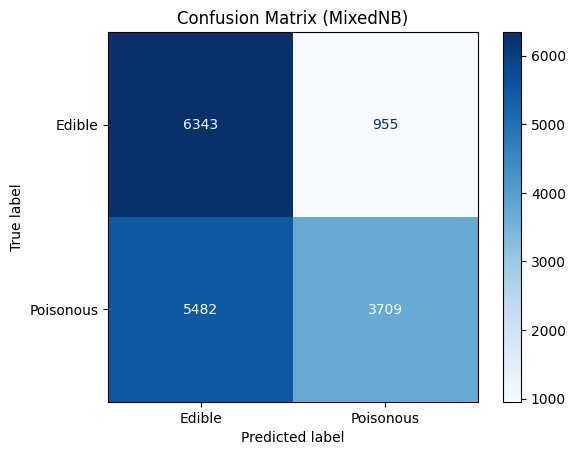

In [496]:


# Step 2: Load the dataset
# Fetch the mushroom dataset with id=848
secondary_mushroom = fetch_ucirepo(id=848)

# Data (as pandas dataframes)
X = secondary_mushroom.data.features 
Y = secondary_mushroom.data.targets

# Concatenate features and targets for easy processing
dataframe = pd.concat([X, Y], axis=1)

# Step 3: Handle missing values
# Fill missing values with the mode for categorical columns
categorical_columns = dataframe.select_dtypes(include=['object']).columns
for col in categorical_columns:
    dataframe[col] = dataframe[col].fillna(dataframe[col].mode()[0])

# Check if there are any remaining missing values
print(dataframe.isnull().sum())

# Step 4: Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_columns:
    dataframe[col] = label_encoder.fit_transform(dataframe[col])

# Split data into features and target
X = dataframe.drop('class', axis=1)
Y = dataframe['class']

# Step 5: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27, random_state=3)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

# Step 6: Initialize and fit the MixedNB model
mixed_nb_model = MixedNB()
mixed_nb_model.fit(X_train, Y_train)

# Step 7: Make predictions on the test set
Y_pred_mixed_nb = mixed_nb_model.predict(X_test)

# Step 8: Evaluate the model
# Convert Y_test and Y_pred_mixed_nb to the same format as MixedNB output
# Assuming labels are now numeric: 0 for 'e', 1 for 'p'
# Adjust if different labels are used
pos_label = 1  # Update this if needed based on your encoding
neg_label = 0  # Update this if needed based on your encoding

# Calculate accuracy
accuracy_mixed_nb = accuracy_score(Y_test, Y_pred_mixed_nb) * 100
print(f'Accuracy (MixedNB): {accuracy_mixed_nb:.2f}%')

# Calculate precision, recall, and F1-score
precision_mixed_nb = precision_score(Y_test, Y_pred_mixed_nb, pos_label=pos_label)
recall_mixed_nb = recall_score(Y_test, Y_pred_mixed_nb, pos_label=pos_label)
f1_mixed_nb = f1_score(Y_test, Y_pred_mixed_nb, pos_label=pos_label)

print(f'Precision (MixedNB): {precision_mixed_nb:.2f}')
print(f'Recall (MixedNB): {recall_mixed_nb:.2f}')
print(f'F1-Score (MixedNB): {f1_mixed_nb:.2f}')

# Compute and visualize the confusion matrix
conf_matrix_mixed_nb = confusion_matrix(Y_test, Y_pred_mixed_nb, labels=[neg_label, pos_label])
conf_matrix_disp_mixed_nb = ConfusionMatrixDisplay(conf_matrix_mixed_nb, display_labels=['Edible', 'Poisonous'])
conf_matrix_disp_mixed_nb.plot(cmap='Blues')
plt.title('Confusion Matrix (MixedNB)')
plt.show()


In [498]:
# Import necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from mixed_naive_bayes import MixedNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the mushroom dataset
dataset = fetch_ucirepo(id=848)

# Extract features and target variable from the dataset
X = dataset.data.features
Y = dataset.data.targets

# Combine features and target for easier processing
df = pd.concat([X, Y], axis=1)

# Handle missing values by filling with the most common value (mode) for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check for any remaining missing values
print("Missing values after imputation:")
print(df.isnull().sum())

# Convert categorical variables to numeric
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

# Separate features and target
X = df.drop('class', axis=1)
Y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.27, random_state=3)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

# Initialize and train the Mixed Naive Bayes model
model = MixedNB()
model.fit(X_train, Y_train)

# Predict the target values for the test set
Y_pred = model.predict(X_test)

# Evaluate the model's performance
# Adjust pos_label based on how your target labels are encoded
pos_label = 1  # Assuming 1 is the positive class, adjust if necessary
neg_label = 0  # Assuming 0 is the negative class, adjust if necessary



C:\Users\badha\AppData\Local\Temp\ipykernel_4388\545297998.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Missing values after imputation:
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
class                   0
dtype: int64
Training data shape: (44580, 20)
Testing data shape: (16489, 20)


# Task 7

Accuracy of MixedNB: 60.96%
Precision: 0.80
Recall: 0.40
F1-Score: 0.54


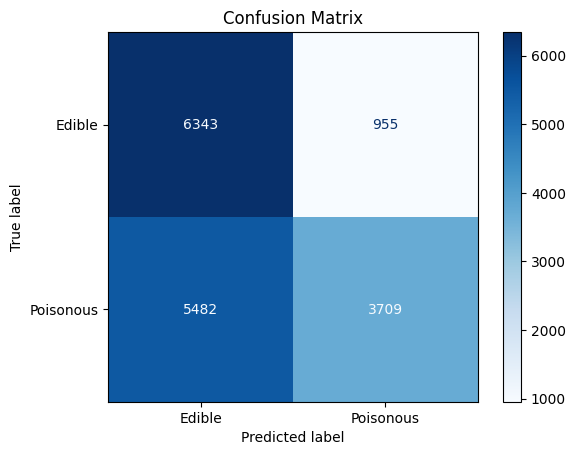

In [500]:
#calculating the accuracy ,precision,recall,f1-score by mixNB

accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f'Accuracy of MixedNB: {accuracy:.2f}%')

precision = precision_score(Y_test, Y_pred, pos_label=pos_label)
recall = recall_score(Y_test, Y_pred, pos_label=pos_label)
f1 = f1_score(Y_test, Y_pred, pos_label=pos_label)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# Create and display the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred, labels=[neg_label, pos_label])
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Edible', 'Poisonous'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
